## <u> K-means Clustering </u>

K-means clustering is a type of unsupervised learning, which is used with unlabeled dataset. The goal of this algorithm is to find K groups in the data. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

- The centroids of the K clusters, which can be used to label new data
- Labels for the training data (each data point is assigned to a single cluster)

K-means works by defining spherical clusters that are separable in a way so that the mean value converges towards the cluster center. Because of this, K-Means may underperform sometimes.

<b><u>Use Cases:</u></b>
- Document Classification
- Delivery Store Optimization
- Customer Segmentation
- Insurance Fraud Detection etc.

### <u> Algorithm </u>:

Κ-means clustering algorithm inputs are the number of clusters Κ and the data set. Algorithm starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

<b><u>1. Data assigment step:</u></b>

Each centroid defines one of the clusters. In this step, each data point based on the squared Euclidean distance is assigned to its nearest centroid. If $c_i$ is the collection of centroids in set C, then each data point x is assigned to a cluster based on

$$\underset{c_i \in C}{\min} \; dist(c_i,x)^2$$

where dist( · ) is the standard (L2) Euclidean distance.

<b><u>2. Centroid update step:</u></b>

Centroids are recomputed by taking the mean of all data points assigned to that centroid's cluster.

The algorithm iterates between step one and two until a stopping criteria is met (no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

<b>This algorithm may converge on a local optimum. </b> Assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

<b><u>Choosing K</u></b>

If the true label is not known in advance, then K-Means clustering can be evaluated using <b> Elbow Criterion </b>, <b> Silhouette Coefficient </b> , cross-validation, information criteria, the information theoretic jump method, and the G-means algorithm. .


<b><u>Elbow Criterion Method:</u></b>

The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (e.g k=1 to 10), for each value of k, calculate sum of squared errors (SSE).

Calculate the mean distance between data points and their cluster centroid. Increasing the number of clusters(K) will always reduce the distance to data points, thus decrease this metric, to the extreme of reaching zero when K is as same as the number of data points. So the goal is to choose a small value of k that still has a low SSE.

We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point.

<b><u>Silhouette Coefficient Method:</u></b>

A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

- The mean distance between a sample and all other points in the same class.
- The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient is for a single sample is then given as:

$$s=\frac{b-a}{max(a,b)}$$

To find the optimal value of k for KMeans, loop through 1..n for n_clusters in KMeans and calculate Silhouette Coefficient for each sample.

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

<u>K-Means algorithm uses Eucledean Distance, other popular distance metrics in Machine Learning are:</u>

1. <b> Cosine distance </b>: It determines the cosine of the angle between the point vectors of the two points in the n dimensional space. Closer the point vectors are by angle, the higher is the Cosine Similarity

$$\cos\theta = \frac{\overrightarrow{a} . \overrightarrow{b}}{\parallel \overrightarrow{a} \parallel \parallel \overrightarrow{b} \parallel} = \frac{\sum_{i=1}^{n} a_ib_i}{\sqrt{\sum_{i=1}^{n}a_i^2 \sqrt{\sum_{i=1}^{n}b_i^2}}}$$

where $\overrightarrow{a} . \overrightarrow{b} = \sum_{i=1}^{n}a_ib_i = a_1b_1 + a_2b_2 + ... + a_nb_n$

2. <b> Manhattan distance </b>: is the total sum of the difference between the x-coordinates  and y-coordinates.

$$ManhattanDistance = |x1 – x2| + |y1 – y2|$$

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values. Various distance measures, or norms, are possible:

- Computing the root of a sum of squares (RMSE) corresponds to the Euclidian norm: it is the notion of distance you are familiar with. It is also called the ℓ2 norm(...)

- Computing the sum of absolutes (MAE) corresponds to the ℓ1 norm,(...). It is sometimes called the Manhattan norm because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.

### <u> Example </u>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [22]:
raw_df = pd.read_csv('CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [26]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
 
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544828


<b>Elbow Criterion:</b>

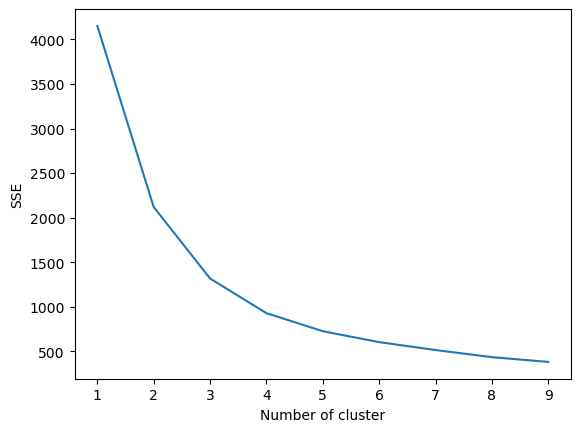

In [6]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

<b>Silhouette Coefficient Method:</b>

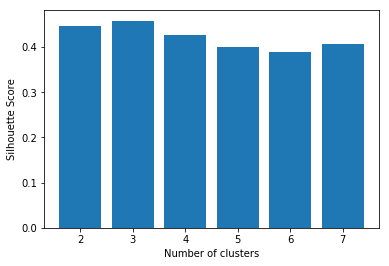

In [5]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

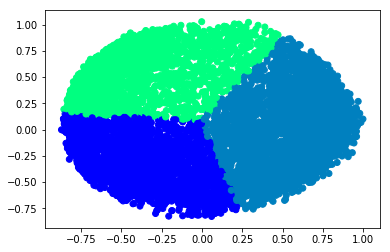

In [7]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

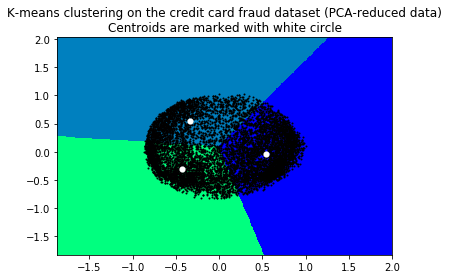

In [8]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_principal['P1'].min() - 1, X_principal['P1'].max() + 1
y_min, y_max = X_principal['P2'].min() - 1, X_principal['P2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.

# https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
# https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = kmeans.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
# https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.winter,
           aspect='auto', origin='lower')

plt.plot(X_principal['P1'], X_principal['P2'], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n'
          'Centroids are marked with white circle')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

### <u>Accuracy metrics</u>

As opposed to classfication, it is difficult to assess the quality of results from clustering. Here, a metric cannot depend on the labels but only on the goodness of split. Secondly, we do not usually have true labels of the observations when we use clustering.

There are internal and external goodness metrics. External metrics use the information about the known true split while internal metrics do not use any external information and assess the goodness of clusters based only on the initial data. The optimal number of clusters is usually defined with respect to some internal metrics.

<u> <b>External Goodness Metrics</b></u>

F-measure, Normalized Mutual Information(the average mutual information between every pair of clusters and their class), Rand Index etc.

<u> <b>Internal Goodness Metrics</b></u>

Davies-Bouldin index,Silhouette index,Dunn index,Partition Coefficient, Entropy,Separation Index,Xie and Beni's Index etc.

<u> <b>Normalized Mutual Information (NMI)</b></u>

Mutual Information of two random variables is a measure of the mutual dependence between the two variables. Normalized Mutual Information is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation). In other words, 0 means dissimilar and 1 means a perfect match.

<u> <b>Adjusted Rand Score (ARS)</b></u>

Adjusted Rand Score on the other hand, computes a similarity measure between two clusters. ARS considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusters. 0 is the lowest similarity and 1 is the highest.